<a href="https://colab.research.google.com/github/rootofdata/kostat_AI_contest/blob/main/%5BFinal%5D_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 256->512 ver. CNN-LSTM

In [ ]:
!pip install gensim

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
import pickle

# 함수 및 데이터 로드

In [ ]:
def compute_pca(X: np.ndarray, n_components: int=2) -> np.ndarray:

    X_demeaned = X - X.mean(axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)

    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = list(reversed(idx_sorted))

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    # once again, make sure to get all the rows and only slice the columns
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.T, X_demeaned.T).T
    return X_reduced

In [ ]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [ ]:
word2vec_model = word2vec.Word2Vec.load('/content/drive/MyDrive/통계청_AI경진대회/final/data/train_final.model2')
word2vec_model = word2vec_model.wv
submission = pd.read_csv('/content/drive/MyDrive/통계청_AI경진대회/모델 개발용 자료/모델 개발용 자료.csv',header = 1)
data = pd.read_csv('/content/drive/MyDrive/통계청_AI경진대회/실습용 자료/실습용 자료.csv',header = 1)

In [ ]:
train = []
with open('/content/drive/MyDrive/통계청_AI경진대회/final/data/train_final2','rb') as f:
    train = pickle.load(f)
max_len = max(len(l) for l in train)

test = []
with open('/content/drive/MyDrive/통계청_AI경진대회/final/data/submission_final2','rb') as f:
    test = pickle.load(f)
max_len2 = max(len(l) for l in test)

In [ ]:
print(len(train))

1000495


In [ ]:
max_len, max_len2

(53, 49)

# embedding Matrix-> pca

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train[:-495])
vocab_size = len(tokenizer.word_index) + 1 # 패딩을 고려하여 +1
print('단어 집합 :',vocab_size)

X_encoded = tokenizer.texts_to_sequences(train[:-495])
#print('정수 인코딩 결과 :',X_encoded.shape)

단어 집합 : 37117


In [ ]:
a1=pd.DataFrame(data['digit_3'])
y = a1
y

,digit_3
0,952
1,472
2,467
3,475
4,872
...,...
999995,134
999996,424
999997,474
999998,856


In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

y_train = y.astype(str)

le = LabelEncoder()
le.fit(y_train)
print(le.classes_)
labels = le.classes_

['101' '102' '103' '104' '105' '106' '107' '108' '11' '111' '112' '12'
 '120' '131' '132' '133' '134' '139' '14' '141' '142' '143' '144' '151'
 '152' '161' '162' '163' '171' '172' '179' '181' '182' '191' '192' '20'
 '201' '202' '203' '204' '205' '211' '212' '213' '221' '222' '231' '232'
 '233' '239' '241' '242' '243' '251' '252' '259' '261' '262' '263' '264'
 '265' '266' '271' '272' '273' '274' '281' '282' '283' '284' '285' '289'
 '291' '292' '301' '302' '303' '304' '31' '311' '312' '313' '319' '32'
 '320' '331' '332' '333' '334' '339' '340' '351' '352' '353' '360' '370'
 '381' '382' '383' '390' '411' '412' '421' '422' '423' '424' '425' '426'
 '451' '452' '453' '461' '462' '463' '464' '465' '466' '467' '468' '471'
 '472' '473' '474' '475' '476' '477' '478' '479' '491' '492' '493' '494'
 '495' '501' '502' '51' '511' '512' '521' '529' '551' '559' '561' '562'
 '581' '582' '591' '592' '601' '602' '61' '611' '612' '62' '620' '631'
 '639' '641' '642' '649' '651' '652' '653' '661' '662' '681'

C:\Users\SEO\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
print(labels)
y_train = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape) 

['101' '102' '103' '104' '105' '106' '107' '108' '11' '111' '112' '12'
 '120' '131' '132' '133' '134' '139' '14' '141' '142' '143' '144' '151'
 '152' '161' '162' '163' '171' '172' '179' '181' '182' '191' '192' '20'
 '201' '202' '203' '204' '205' '211' '212' '213' '221' '222' '231' '232'
 '233' '239' '241' '242' '243' '251' '252' '259' '261' '262' '263' '264'
 '265' '266' '271' '272' '273' '274' '281' '282' '283' '284' '285' '289'
 '291' '292' '301' '302' '303' '304' '31' '311' '312' '313' '319' '32'
 '320' '331' '332' '333' '334' '339' '340' '351' '352' '353' '360' '370'
 '381' '382' '383' '390' '411' '412' '421' '422' '423' '424' '425' '426'
 '451' '452' '453' '461' '462' '463' '464' '465' '466' '467' '468' '471'
 '472' '473' '474' '475' '476' '477' '478' '479' '491' '492' '493' '494'
 '495' '501' '502' '51' '511' '512' '521' '529' '551' '559' '561' '562'
 '581' '582' '591' '592' '601' '602' '61' '611' '612' '62' '620' '631'
 '639' '641' '642' '649' '651' '652' '653' '661' '662' '681'

In [ ]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
print('패딩 결과 :')
print(X_train)
print('y_train numclass',y_train.shape)

패딩 결과 :
[[  92   18   87 ...    0    0    0]
 [1141  183  147 ...    0    0    0]
 [  38  462  331 ...    0    0    0]
 ...
 [  42   14    0 ...    0    0    0]
 [ 562    0    0 ...    0    0    0]
 [  30 1177    0 ...    0    0    0]]
y_train numclass (1000000, 225)


In [ ]:
# numclass = data['digit_3'].nunique()

embedding_matrix = np.zeros((vocab_size, 100))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (37117, 100)


In [ ]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

## PCA 100 -> 50

In [ ]:
X = embedding_matrix
X_reduced = compute_pca(X, n_components=50)

In [ ]:
y_train = y_train.astype(int)

In [ ]:
X_reduced.shape

(37117, 50)

In [ ]:
del(X)

# fine tuning

In [ ]:
!pip install optuna

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Activation, Dropout, LSTM, Dense,Conv1D,MaxPooling1D,Embedding,Flatten
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


def build_cnn_lstm2(recurrent_dropout = 0.5,dropout=0.5,):
    with tf.device('/gpu:0'):
        model = Sequential()

        model.add(Input(shape=(max_len,)))
        e = Embedding(vocab_size,output_dim =50,  weights=[X_reduced], input_length=max_len, trainable=False)
        model.add(e)

        model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(dropout))

        model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=2))

        model.add(LSTM(256, recurrent_dropout=recurrent_dropout,activation='tanh',kernel_initializer="he_normal",unroll=True,return_sequences=True))
        model.add(Dropout(dropout))

        model.add(LSTM(512, recurrent_dropout=recurrent_dropout,activation='tanh',kernel_initializer="he_normal",unroll=True))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(y_train.shape[1], activation='softmax'))
        # adam = tf.keras.optimizers.Adam(learning_rate = 1e-5)
        

        return model

In [ ]:
from sklearn.model_selection import StratifiedKFold , KFold
is_holdout = False
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True)

optimizer = tf.keras.optimizers.Adam(learning_rate = 8.382620250945622e-05)

In [ ]:
scores = []
models = []

for tri, vai in cv.split(X_train):
    model = build_cnn_lstm2()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
    history = model.fit(X_train[tri], y_train[tri],
                        validation_data=(X_train[vai], y_train[vai]),
                        epochs=40,callbacks=callbacks,
                        batch_size = 106, verbose=1) 
    models.append(model)
    scores.append(history.history["accuracy"])
    if is_holdout:
        break    

Epoch 1/40
7548/7548 [==============================] - 489s 64ms/step - loss: 1.7611 - accuracy: 0.5748 - val_loss: 0.9440 - val_accuracy: 0.7571
Epoch 2/40
7548/7548 [==============================] - 465s 62ms/step - loss: 1.1057 - accuracy: 0.7163 - val_loss: 0.7665 - val_accuracy: 0.7985
Epoch 3/40
7548/7548 [==============================] - 468s 62ms/step - loss: 0.9581 - accuracy: 0.7518 - val_loss: 0.6892 - val_accuracy: 0.8188
Epoch 4/40
7548/7548 [==============================] - 467s 62ms/step - loss: 0.8843 - accuracy: 0.7704 - val_loss: 0.6471 - val_accuracy: 0.8298
Epoch 5/40
7548/7548 [==============================] - 466s 62ms/step - loss: 0.8377 - accuracy: 0.7821 - val_loss: 0.6202 - val_accuracy: 0.8367
Epoch 6/40
7548/7548 [==============================] - 469s 62ms/step - loss: 0.8041 - accuracy: 0.7899 - val_loss: 0.6026 - val_accuracy: 0.8408
Epoch 7/40
7548/7548 [==============================] - 467s 62ms/step - loss: 0.7833 - accuracy: 0.7953 - val_loss: 0

7548/7548 [==============================] - 463s 61ms/step - loss: 0.7162 - accuracy: 0.8116 - val_loss: 0.5467 - val_accuracy: 0.8556
Epoch 13/40
7548/7548 [==============================] - 472s 63ms/step - loss: 0.7099 - accuracy: 0.8135 - val_loss: 0.5421 - val_accuracy: 0.8577
Epoch 14/40
7548/7548 [==============================] - 471s 62ms/step - loss: 0.7026 - accuracy: 0.8146 - val_loss: 0.5377 - val_accuracy: 0.8591
Epoch 15/40
7548/7548 [==============================] - 468s 62ms/step - loss: 0.6969 - accuracy: 0.8165 - val_loss: 0.5345 - val_accuracy: 0.8594
Epoch 16/40
7548/7548 [==============================] - 480s 64ms/step - loss: 0.6916 - accuracy: 0.8177 - val_loss: 0.5326 - val_accuracy: 0.8606
Epoch 17/40
7548/7548 [==============================] - 479s 63ms/step - loss: 0.6854 - accuracy: 0.8194 - val_loss: 0.5279 - val_accuracy: 0.8613
Epoch 18/40
7548/7548 [==============================] - 478s 63ms/step - loss: 0.6819 - accuracy: 0.8201 - val_loss: 0.5239

7548/7548 [==============================] - 478s 63ms/step - loss: 0.6601 - accuracy: 0.8257 - val_loss: 0.5084 - val_accuracy: 0.8649
Epoch 26/40
7548/7548 [==============================] - 471s 62ms/step - loss: 0.6574 - accuracy: 0.8264 - val_loss: 0.5068 - val_accuracy: 0.8648
Epoch 27/40
7548/7548 [==============================] - 474s 63ms/step - loss: 0.6553 - accuracy: 0.8266 - val_loss: 0.5054 - val_accuracy: 0.8653
Epoch 28/40
7548/7548 [==============================] - 513s 68ms/step - loss: 0.6526 - accuracy: 0.8273 - val_loss: 0.5062 - val_accuracy: 0.8658
Epoch 29/40
7548/7548 [==============================] - 475s 63ms/step - loss: 0.6508 - accuracy: 0.8285 - val_loss: 0.5025 - val_accuracy: 0.8663
Epoch 30/40
7548/7548 [==============================] - 481s 64ms/step - loss: 0.6494 - accuracy: 0.8283 - val_loss: 0.5024 - val_accuracy: 0.8667
Epoch 31/40
7548/7548 [==============================] - 487s 65ms/step - loss: 0.6470 - accuracy: 0.8286 - val_loss: 0.5014

7548/7548 [==============================] - 498s 66ms/step - loss: 0.6314 - accuracy: 0.8326 - val_loss: 0.4954 - val_accuracy: 0.8683
Epoch 39/40
7548/7548 [==============================] - 501s 66ms/step - loss: 0.6302 - accuracy: 0.8332 - val_loss: 0.4946 - val_accuracy: 0.8682
Epoch 40/40
7548/7548 [==============================] - 501s 66ms/step - loss: 0.6288 - accuracy: 0.8333 - val_loss: 0.4914 - val_accuracy: 0.8688
Epoch 1/40
7548/7548 [==============================] - 503s 66ms/step - loss: 1.5876 - accuracy: 0.6057 - val_loss: 0.9151 - val_accuracy: 0.7604
Epoch 2/40
7548/7548 [==============================] - 483s 64ms/step - loss: 1.0852 - accuracy: 0.7188 - val_loss: 0.7545 - val_accuracy: 0.8016
Epoch 3/40
7548/7548 [==============================] - 483s 64ms/step - loss: 0.9473 - accuracy: 0.7538 - val_loss: 0.6857 - val_accuracy: 0.8191
Epoch 4/40
7548/7548 [==============================] - 482s 64ms/step - loss: 0.8755 - accuracy: 0.7716 - val_loss: 0.6435 - v

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/통계청_AI경진대회/final/data/mode_k_fold.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/통계청_AI경진대회/final/data/mode_k_fold.h5')

In [ ]:
print(scores)
print(np.mean(scores))

[[0.5748075246810913, 0.7162912487983704, 0.7518012523651123, 0.7704062461853027, 0.782057523727417, 0.7899324893951416, 0.7953137755393982, 0.800163745880127, 0.8033524751663208, 0.8068000078201294, 0.8091149926185608, 0.8121437430381775, 0.8135137557983398, 0.8148425221443176, 0.8168274760246277, 0.8182799816131592, 0.819186270236969, 0.8209025263786316, 0.821524977684021, 0.822380006313324, 0.8232662677764893, 0.8241337537765503, 0.8249874711036682, 0.8254975080490112, 0.826259970664978, 0.8266987204551697, 0.8273587226867676, 0.8278312683105469, 0.8282062411308289, 0.828983724117279, 0.8294699788093567, 0.8301874995231628, 0.8306487202644348, 0.8304637670516968, 0.831250011920929, 0.8314974904060364, 0.8317912220954895, 0.8325275182723999, 0.8328225016593933, 0.8325087428092957], [0.6033812761306763, 0.7153674960136414, 0.7509474754333496, 0.7697362303733826, 0.7816449999809265, 0.7892312407493591, 0.7958325147628784, 0.7998862266540527, 0.8037599921226501, 0.8065549731254578, 0.80

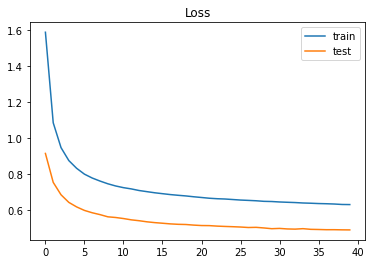

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

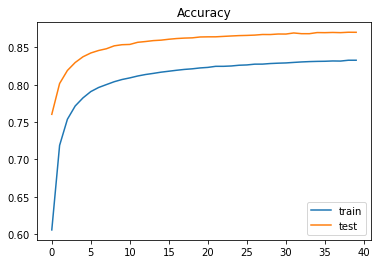

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# test padding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test)
X_encoded = tokenizer.texts_to_sequences(test)
#print('정수 인코딩 결과 :',X_encoded.shape)

In [ ]:
X_test = pad_sequences(X_encoded, maxlen=max_len, padding='post')

In [ ]:
pred_list =[]
for i,(tri, vai) in enumerate(cv.split(X_train,y_train) ):
    pred = models[i].predict(X_test)
    pred_list.append(pred)

In [ ]:
y_pred = np.mean(pred_list,axis=0)
predicted = y_pred.argmax(axis=-1)

In [ ]:
digit_1_index = [1.0, 5.0, 10.0, 35.0, 36.0, 41.0, 45.0, 49.0, 55.0, 58.0, 64.0, 68.0, 70.0, 74.0, 84.0, 85.0, 86.0, 90.0, 94.0, 97.0, 99.0]
digit_1_value = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M','N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']

dsa = [ i for i in range(100)]
def search_digit_1(i):
    ans = 0
    if i <digit_1_index[1]:
        ans = digit_1_value[0]
    elif i <digit_1_index[2]:
        ans=digit_1_value[1]
    elif i <digit_1_index[3]:
        ans=digit_1_value[2]

    elif i <digit_1_index[4]:
        ans=digit_1_value[3]
    elif i <digit_1_index[5]:
        ans=digit_1_value[4]

    elif i <digit_1_index[6]:
        ans=digit_1_value[5]
    elif i <digit_1_index[7]:
        ans=digit_1_value[6]

    elif i <digit_1_index[8]:
        ans=digit_1_value[7]
    elif i <digit_1_index[9]:
        ans=digit_1_value[8]
    elif i <digit_1_index[10]:
        ans=digit_1_value[9]
    elif i <digit_1_index[11]:
        ans=digit_1_value[10]
    elif i <digit_1_index[12]:
        ans=digit_1_value[11]

    elif i <digit_1_index[13]:
        ans=digit_1_value[12]
    elif i <digit_1_index[14]:
        ans=digit_1_value[13]

    elif i <digit_1_index[15]:
        ans=digit_1_value[14]
    elif i <digit_1_index[16]:
        ans=digit_1_value[15]

    elif i <digit_1_index[17]:
        ans=digit_1_value[16]
    elif i <digit_1_index[18]:S
        ans=digit_1_value[17]

    elif i <digit_1_index[19]:
        ans=digit_1_value[18]
    elif i <digit_1_index[20]:
        ans=digit_1_value[19]

    else:
        ans=digit_1_value[20]
    return ans

In [ ]:
for i in range(len(predicted)):
    if len(labels[predicted[i]]) == 2:
        submission['digit_3'][i] = int(labels[predicted[i]])
        submission['digit_2'][i] = int(labels[predicted[i]][0])
        submission['digit_1'][i] = search_digit_1(int(labels[predicted[i]])//10)
    submission['digit_3'][i] = int(labels[predicted[i]])
    submission['digit_2'][i] = int(labels[predicted[i]])//10
    submission['digit_1'][i] = search_digit_1(int(labels[predicted[i]])//10)
submission

<ipython-input-63-ab4b631f4e13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['digit_3'][i] = int(labels[predicted[i]])
<ipython-input-63-ab4b631f4e13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['digit_2'][i] = int(labels[predicted[i]])//10
<ipython-input-63-ab4b631f4e13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['digit_1'][i] = search_digit_1(int(labels[predicted[i]])//10)
C:\Users\SEO\

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_000001,S,96.0,961.0,치킨전문점에서,고객의주문에의해,치킨판매
1,id_000002,L,68.0,682.0,산업공구,다른 소매업자에게,철물 수공구
2,id_000003,S,96.0,969.0,절에서,신도을 대상으로,불교단체운영
3,id_000004,G,46.0,463.0,영업장에서,고객요구로,자동차튜닝
4,id_000005,I,56.0,561.0,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공"
...,...,...,...,...,...,...,...
99995,id_099996,C,28.0,284.0,사업장에서,일반인대상으로,버섯농장
99996,id_099997,C,25.0,259.0,한의원에서,외래환자위주고,치료
99997,id_099998,H,49.0,494.0,일반점포에서,소비자에게,그림판매
99998,id_099999,I,56.0,561.0,사업장에서,일반인.학생대상으로,학습공간제공


In [ ]:
submission[['digit_2','digit_3']] = submission[['digit_2','digit_3']].astype(int)

In [ ]:
submission.to_csv('/content/drive/MyDrive/통계청_AI경진대회/final/data/sub1_optuna.csv', index=False)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
